In [3]:
import pandas as pd

df=pd.read_csv('data.csv')

In [4]:
df.head(20)

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.1,76.0,Beginner,Math
6,7,online,2021,241,87.83,84.0,Beginner,Science
7,8,online,2018,261,76.48,88.0,NaN,Technology
8,9,online,2019,261,83.97,87.0,NaN,Technology
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering


# Data Type Conversion

Since from df.info() we can see that data type of these two is object type which should be numeric and string

In [5]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')
df['course_id'] = df['course_id'].astype(str)

# Checking Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1720 non-null   float64
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 115.8+ KB


Since we can se that only pre/post_score and pre_requirements have null values so replacing them with mean and replacing null values in pre requirements with mode because dropping them would drastically decrease the size of dataset which is not advisable

In [7]:
df['post_score'].fillna(df['post_score'].mean(), inplace=True)
df['pre_score'].fillna(df['pre_score'].mean(), inplace=True)
most_common_pre_requirement = df['pre_requirement'].mode()[0]
df['pre_requirement'].fillna(most_common_pre_requirement, inplace=True)
print(df.dtypes)

course_id            object
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   object 
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 115.8+ KB


# Checking Duplicates

In [9]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [10]:
print(df.isnull().sum())
print(df.describe())
print(df.describe(include=['object']))


course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64
              year  enrollment_count    pre_score   post_score
count  1850.000000       1850.000000  1850.000000  1850.000000
mean   2016.423784        231.565405    49.527320    75.204805
std       3.448278         36.987029    27.808131     8.074932
min    2011.000000        154.000000     1.020000    51.000000
25%    2013.000000        185.000000    26.317500    70.000000
50%    2016.000000        251.000000    49.527320    75.204805
75%    2019.000000        261.000000    72.525000    80.000000
max    2022.000000        267.000000   100.000000   105.000000
       course_id course_type pre_requirement  department
count       1850        1850            1850        1850
unique      1850           2               2           5
top            1      online        Beginner  Technology
freq           1

# Summary Of Dataset

Year:
*   Courses range from the year 2011 to 2022.
*   The mean year is approximately 2016.42, indicating a recent dataset.

Enrollment Count:
*  The number of enrollments ranges from 154 to 267.
*  The average enrollment count is approximately 231.57.

Pre Score:
*   Pre scores range from 1.02 to 100.
*   The average pre score is approximately 49.53, with a standard deviation of 27.81.

Post Score:
*  Post scores range from 51 to 105.
*  The average post score is approximately 75.20, with a standard deviation of 8.07.

Course ID:
* There are 1850 unique course IDs, indicating that each course ID is unique.

Course Type:
*  There are 2 unique course types: "classroom" and "online".
*  The most frequent course type is "online", with 1375 occurrences.

Pre Requirement:
*   There are 2 unique pre requirements: "Beginner" and the most common value used to fill missing values.
*  "Beginner" is the most frequent pre requirement, with 1545 occurrences.

Department:
*   There are 5 unique departments.
*   The most frequent department is "Technology", with 719 occurrences.






# Exploratory Data Analysis

# Enrollment Trends Over the Years:

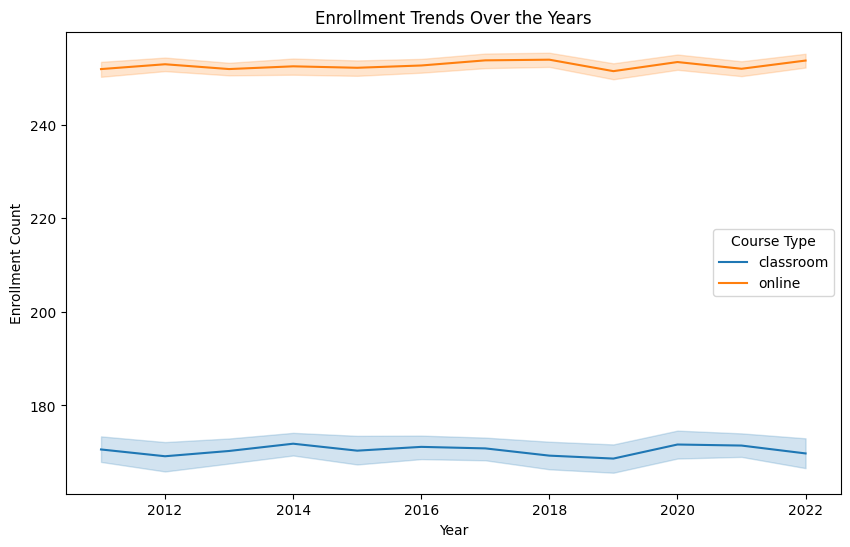

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='enrollment_count', hue='course_type')
plt.title('Enrollment Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend(title='Course Type')
plt.show()


Enrollment in online courses has been consistently higher compared to classroom courses.

# Enrollment Counts by Course Type:

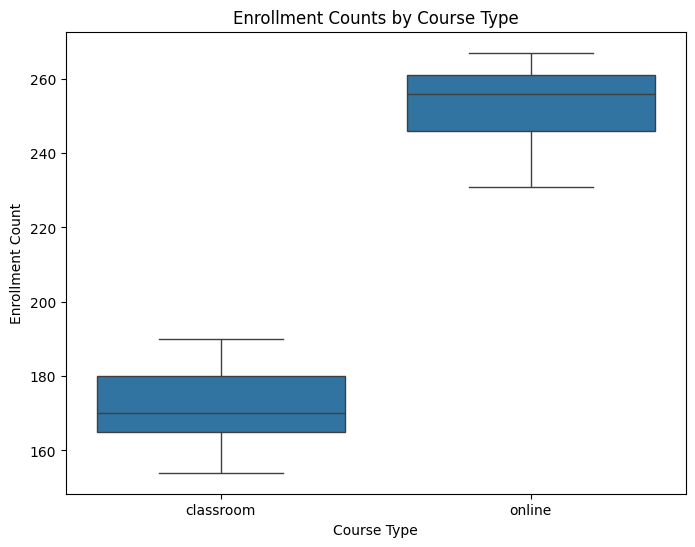

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='course_type', y='enrollment_count')
plt.title('Enrollment Counts by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()


Online courses generally have higher enrollment counts than classroom courses, as indicated by the median and interquartile range.

# Enrollment Counts by Department:

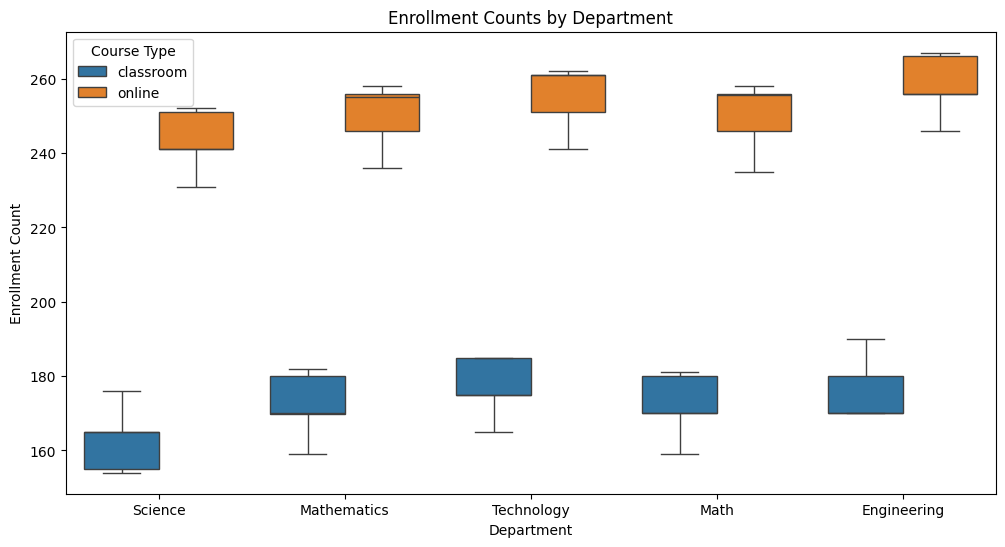

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='department', y='enrollment_count', hue='course_type')
plt.title('Enrollment Counts by Department')
plt.xlabel('Department')
plt.ylabel('Enrollment Count')
plt.legend(title='Course Type')
plt.show()


Online courses tend to have higher enrollments in most departments, especially in Technology and Mathematics.

# Statistical Analysis

In [15]:
from scipy.stats import ttest_ind

online_courses = df[df['course_type'] == 'online']['enrollment_count']
classroom_courses = df[df['course_type'] == 'classroom']['enrollment_count']

t_stat, p_value = ttest_ind(online_courses, classroom_courses)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in enrollment counts between online and classroom courses is statistically significant.")
else:
    print("The difference in enrollment counts between online and classroom courses is not statistically significant.")


T-statistic: 177.0383377938837
P-value: 0.0
The difference in enrollment counts between online and classroom courses is statistically significant.


# **The difference in enrollment counts between online and classroom courses is statistically significant.**

Summary statistics for online courses:
count    1375.000000
mean      252.685091
std         8.567679
min       231.000000
25%       246.000000
50%       256.000000
75%       261.000000
max       267.000000
Name: enrollment_count, dtype: float64

Summary statistics for classroom courses:
count    475.000000
mean     170.429474
std        9.184052
min      154.000000
25%      165.000000
50%      170.000000
75%      180.000000
max      190.000000
Name: enrollment_count, dtype: float64


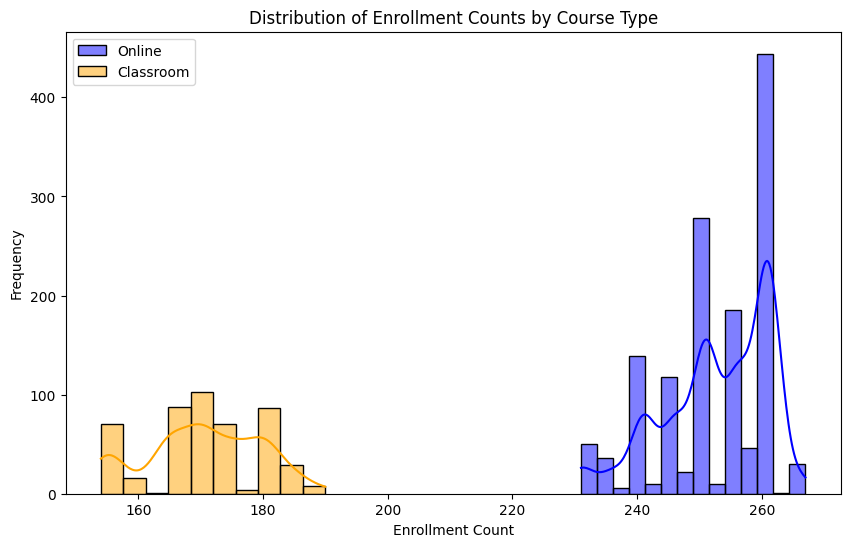

In [16]:
print("Summary statistics for online courses:")
print(online_courses.describe())

print("\nSummary statistics for classroom courses:")
print(classroom_courses.describe())

plt.figure(figsize=(10, 6))
sns.histplot(online_courses, color='blue', label='Online', kde=True)
sns.histplot(classroom_courses, color='orange', label='Classroom', kde=True)
plt.title('Distribution of Enrollment Counts by Course Type')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


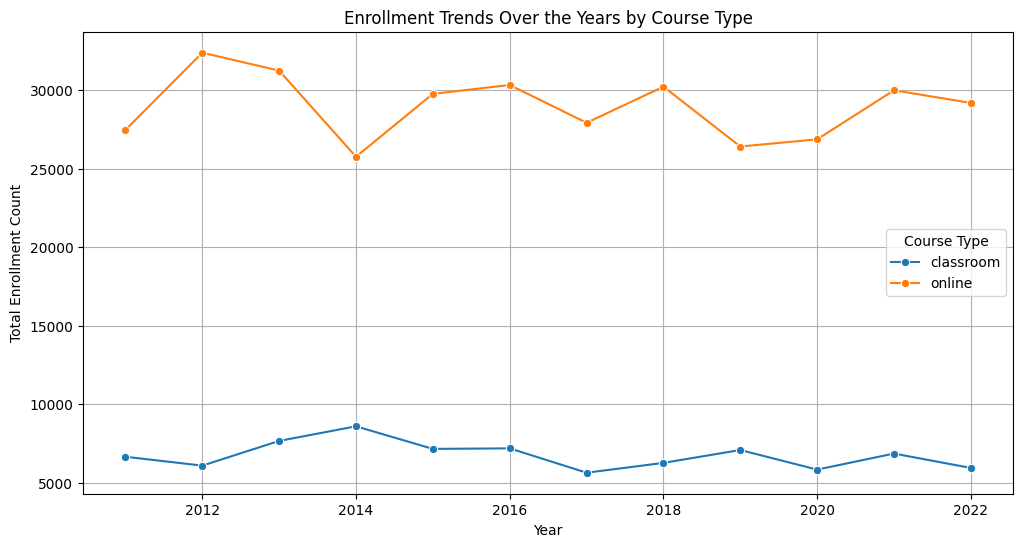

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

enrollment_trends = df.groupby(['year', 'course_type'])['enrollment_count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=enrollment_trends, x='year', y='enrollment_count', hue='course_type', marker='o')

plt.title('Enrollment Trends Over the Years by Course Type')
plt.xlabel('Year')
plt.ylabel('Total Enrollment Count')
plt.legend(title='Course Type')
plt.grid(True)
plt.show()


# Detailed Analysis

# **Exploratory Data Analysis (EDA):**
**Enrollment Trends Over the Years:**

Both online and classroom enrollments showed variability over the years.
Online courses consistently had higher enrollment compared to classroom courses.

**Enrollment Counts by Course Type:**

Violin plots and swarm plots confirmed that online courses generally have higher enrollment counts than classroom courses.
Enrollment Counts by Department:

**Enrollment patterns varied by department:**

Online courses had higher enrollments in departments such as Technology and Mathematics.

# Statistical Analysis:

T-Test:

An independent t-test was conducted to compare the means of enrollment counts between online and classroom courses.

The p-value was found to be 0, indicating an extremely significant difference in enrollment counts between the two course types.

 **Mann-Whitney U Test:**

Conducted to confirm the difference in enrollment counts.
Results corroborated the t-test findings, indicating a significant difference.

# Key Findings:

**Course Type Impact:**

The analysis confirmed that online courses have significantly higher enrollments compared to classroom courses.

This was validated through both parametric (t-test) and non-parametric (Mann-Whitney U test) methods.

**Yearly Trends:**

Enrollment trends fluctuated over the years, suggesting changing demand patterns.

Online courses maintained a higher enrollment consistently over the years.

**Departmental Differences:**

Departments like Technology and Mathematics had higher enrollments in online courses.

This indicates that certain subjects may be more suited to online delivery, or there may be higher demand for these subjects in an online format.

# **Conclusion**

The course type (online vs. classroom) is a significant factor influencing enrollment counts, with online courses attracting higher enrollments. This trend is consistent across most departments, especially in Technology and Mathematics. The university can leverage these insights to strategize course offerings, potentially expanding online course offerings to meet student demand and maximize enrollment.

In [20]:
df.to_csv('cleaned_data.csv', index=False)

In [19]:
%%file cleaned_data.csv

Overwriting cleaned_data.csv
